In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data

In [11]:
gene_df = pd.read_csv('Assignment-2_gene_data- (2) (1) (1).csv')

meta_df = pd.read_csv('Assignment-2 Meta data sheet (2) (1) (1) (1).csv')

/home/monu/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
gene_df.head()

,Unnamed: 0,symbol,S1,S2,S3,S4,S5,S6,S7,S8,...,S21,S22,S23,S24,S25,S26,S27,S28,S29,S30
0,1,Zzz3,253.401685,402.8508776,230.957463,688.486264,358.067836,344.962350,441.155001,301.149694,...,507.882774,465.081486,415.478767,297.061149,488.848114,367.912141,307.199908,347.802509,411.227261,283.709694
1,2,Zzef1,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
2,3,Zyx,40.578958,49.23516006,59.472005,46.212152,61.969671,55.732843,53.819870,54.315691,...,33.512262,36.751853,36.952457,35.718610,27.346198,32.647887,42.006833,32.324596,41.426033,32.754971
3,4,Zyg11b,26.373102,35.00190057,32.389728,34.932372,35.192365,33.858459,27.948378,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797
4,5,Zyg11a,21.152797,21.15279694,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,...,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797,21.152797


In [13]:
print("data Shape : {}".format(gene_df.shape))

data Shape : (22411, 32)


In [14]:
meta_df

,sIdx,Time,Unit
0,S1,9,Hours
1,S2,9,Hours
2,S3,9,Hours
3,S4,7,Hours
4,S5,7,Hours
5,S6,7,Hours
6,S7,5,Hours
7,S8,5,Hours
8,S9,5,Hours
9,S10,0,Hours


### Cleaning the data and getting the data in proper format

In [15]:
# discarding the unnecessary columns
X = gene_df.iloc[:, 2:32]

# cleaning the data
X = X.replace(['hhhh', 'ssssss'], np.nan)
X = X.dropna()

# for samples in rows and genes in columns format
X = X.T

# for small no. of features(genes) as my PC is getting stuck
X = X.iloc[:, :5000]

X.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
S1,253.402,21.1528,40.579,26.3731,21.1528,127.665,107.37,3174.13,71.1494,323.014,...,339.615,175.114,536.427,30.9474,21.1528,381.09,73.4096,21.1528,21.1528,21.1528
S2,402.8508776,21.15279694,49.23516006,35.00190057,21.15279694,147.6023878,100.6658387,3194.642215,64.91903573,330.9528086,...,385.9417975,122.9690386,391.0149646,51.28432358,25.81811715,414.6848664,75.58647798,28.02700218,21.15279694,21.15279694
S3,230.957,21.1528,59.472,32.3897,21.1528,122.691,109.248,2160.67,70.6225,413.739,...,425.03,160.366,434.583,39.0888,30.8197,405.487,62.9159,25.8886,21.1528,21.1528
S4,688.486,21.1528,46.2122,34.9324,21.1528,133.162,135.948,16970.4,62.3015,310.832,...,518.866,159.075,559.695,38.9803,21.1528,459.87,58.1673,28.3154,21.1528,21.1528
S5,358.068,21.1528,61.9697,35.1924,21.1528,196.858,116.891,14609.1,64.4925,419.862,...,400.768,113.413,642.027,52.8887,21.1528,704.819,94.7106,21.1528,21.1528,21.1528


In [16]:
print("data Shape : {}".format(X.shape))

data Shape : (30, 5000)


### Preparing the class labels

In [17]:
y = meta_df.iloc[:, 1]
y

0      9
1      9
2      9
3      7
4      7
5      7
6      5
7      5
8      5
9      0
10     0
11     0
12     4
13     4
14     4
15     6
16     6
17     6
18     8
19     8
20     8
21    10
22    10
23    10
24    12
25    12
26    12
27    11
28    11
29    11
Name: Time, dtype: int64

### Standardizing the data

In [18]:
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)

### Claculating the covariance matrix used for Eigen decomposition

In [19]:
cov_mat = np.cov(X_std.T)

print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.03448276  0.         -0.23893591 ... -0.19606125  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [-0.23893591  0.          1.03448276 ... -0.09388967  0.
   0.        ]
 ...
 [-0.19606125  0.         -0.09388967 ...  1.03448276  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


In [20]:
cov_mat.shape

(5000, 5000)

### Calculating Eigenvalues and Eigenvectors by doing Eigen decomposition of Covariance matrix

In [21]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [22]:
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.00895311+0.j -0.02023382+0.j  0.00280521+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.02662182+0.j -0.00938543+0.j -0.00684485+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [ 0.00211357+0.j  0.01779338+0.j -0.03101819+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   1.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  1.        +0.j]]

Eigenvalues 
[957.83162986+0.j 564.38437844+0.j 298.03413024+0.j ...   0.        +0.j
   0.        +0.j   0.        +0.j]


### Sorting Eigenpairs

In [23]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
957.8316298643517
564.3843784389202
298.03413023754933
264.97796995480985
211.04951001263925
161.05501369996725
141.86555604362863
124.93874909158477
115.79725432721952
104.57257584696896
103.5653330875075
96.64887740308994
91.35190152613454
87.79709736969849
85.6949863439252
81.30648206199197
77.6388281884866
76.30566711208891
74.19844053015262
71.6884215367965
70.53720889651375
69.10449398357788
66.83167531426376
66.16773654065182
65.24320663793299
63.07259640637646
61.64410374263841
60.68323805759382
56.70259291535822
6.629053417424584e-14
6.629053417424584e-14
2.900894258631142e-14
2.900894258631142e-14
2.3861967940578107e-14
2.0177346360278055e-14
1.7205053965118392e-14
1.7205053965118392e-14
1.662548903242926e-14
1.662548903242926e-14
1.6422219634415116e-14
1.6422219634415116e-14
1.6284831313376265e-14
1.4013436515946201e-14
1.4013436515946201e-14
1.3988628305338248e-14
1.3589048681545227e-14
1.3412339857666756e-14
1.3131676766063494e-14
1.2669607

4.946976950816812e-15
4.946976950816812e-15
4.9380594453184116e-15
4.9380594453184116e-15
4.935763949108704e-15
4.935763949108704e-15
4.9340718374625545e-15
4.9340718374625545e-15
4.9214633740349055e-15
4.9214633740349055e-15
4.918085961408445e-15
4.918085961408445e-15
4.915286525071368e-15
4.915286525071368e-15
4.911677276147012e-15
4.911677276147012e-15
4.907012756844472e-15
4.907012756844472e-15
4.905794692985906e-15
4.905794692985906e-15
4.901041827167771e-15
4.901041827167771e-15
4.900832673946736e-15
4.900832673946736e-15
4.900614316325538e-15
4.900614316325538e-15
4.896700995439432e-15
4.896700995439432e-15
4.892797602309461e-15
4.892797602309461e-15
4.886824696069047e-15
4.886824696069047e-15
4.88601270841583e-15
4.88601270841583e-15
4.883240284667937e-15
4.883240284667937e-15
4.878702829081602e-15
4.878702829081602e-15
4.878542763195314e-15
4.878542763195314e-15
4.878328084373546e-15
4.878328084373546e-15
4.877370726646984e-15
4.877370726646984e-15
4.871523127602118e-15
4.8715

2.723024978578028e-15
2.720621281209271e-15
2.720621281209271e-15
2.7163277715581246e-15
2.7163277715581246e-15
2.708468531065432e-15
2.708468531065432e-15
2.7023385784524867e-15
2.7023385784524867e-15
2.6982537670691874e-15
2.6982537670691874e-15
2.692698841918145e-15
2.6900162098426236e-15
2.6900162098426236e-15
2.68364244520897e-15
2.68364244520897e-15
2.6826787694534557e-15
2.6826787694534557e-15
2.6826346635967414e-15
2.6826346635967414e-15
2.6824907042234025e-15
2.6824907042234025e-15
2.682020666227947e-15
2.682020666227947e-15
2.6810931838855914e-15
2.6810931838855914e-15
2.6773936772179657e-15
2.6773936772179657e-15
2.673654139688204e-15
2.673654139688204e-15
2.6669384145691926e-15
2.6669384145691926e-15
2.6655939132635255e-15
2.6655939132635255e-15
2.6642008465479865e-15
2.6642008465479865e-15
2.659174026100502e-15
2.659174026100502e-15
2.6590913641042277e-15
2.6590913641042277e-15
2.6585948496790914e-15
2.6585948496790914e-15
2.6496054205225006e-15
2.6496054205225006e-15
2.64

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


### Creating Projection matrix by concatenating top 2 Eigenvectors

In [26]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(5000,1),
                      eig_pairs[1][1].reshape(5000,1)))

print('Matrix W:\n', matrix_w)
print('\nMatrix W shape:{}' .format(matrix_w.shape))

Matrix W:
 [[ 0.00895311+0.j -0.02023382+0.j]
 [ 0.        +0.j  0.        +0.j]
 [-0.02662182+0.j -0.00938543+0.j]
 ...
 [ 0.00211357+0.j  0.01779338+0.j]
 [ 0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j]]

Matrix W shape:(5000, 2)


### Projecting our samples into the new Feature subspace

In [27]:
Y = X_std.dot(matrix_w)

### Plotting the PC1 and PC2

/home/monu/anaconda3/envs/tensorflow/lib/python3.5/site-packages/numpy/core/numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


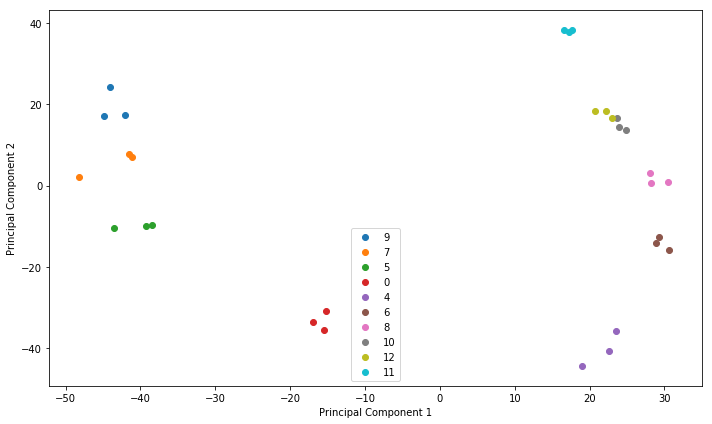

In [28]:
plt.figure(figsize=(10, 6))
    
for lab in ('9', '7', '5', '0', '4', '6', '8', '10', '12', '11'):

    plt.scatter(Y[y==int(lab), 0],
                Y[y==int(lab), 1],
                label=lab)
                
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()